In [1]:
cd ..

/mnt/c/Users/varsh/OneDrive/Desktop/pp


In [40]:
from net import Network
from dataset import Data, Config
import tkinter as tk

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision.datasets as dset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
#Computes dataset
folder_dataset = dset.ImageFolder(root=Config.training_dir)
TRANSFORM = transforms.Compose([transforms.Resize((300,300)),transforms.ToTensor(),transforms.Lambda(lambda x: x[:3])])
dataset = Data(face_dir=folder_dataset,transform=TRANSFORM)

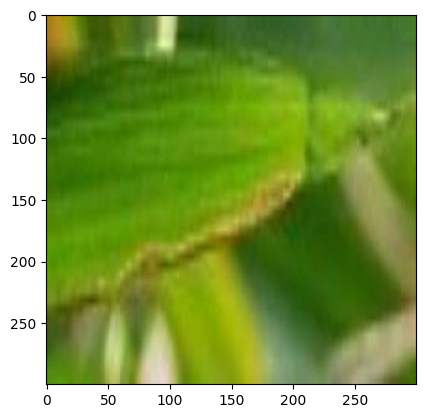

In [32]:
img, lbl = dataset[0]
plt.imshow(img.permute(1,2,0)) 

In [7]:
workers = 0     #Processes
batch = 64      #Size
device = "cpu"  #Mode
dataloader = DataLoader(dataset,shuffle=True,num_workers=workers,batch_size=batch)

In [8]:
#Creates a network and catches loss and rate of training
model = Network()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0005)

In [9]:
#CNN Model Training

def train(dataloader, model, loss_fn, optimizer, device):

        size = len(dataloader.dataset)
        
        model.train()
        train_loss = 0
        
        for batch, (img,label) in enumerate(dataloader):
            img = img.to(device)
            pred = model(img)

            loss = loss_fn(pred,label)
            train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward(retain_graph = True)
            optimizer.step()

            if batch % 10 == 0:
                loss, current = loss.item(), batch * len(img)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]") 
        
        train_loss = train_loss/batch+1
        return train_loss

In [ ]:
#Iterations
epochs = 25

for epoch in range(epochs):

    print(f"Epoch: {epoch+1}\t-----------------\t")

    train_loss = train(dataloader, model, loss_fn, optimizer, device)

print("Done")
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
path = './models/CNN'+dt_string+'.pth'
torch.save(model.state_dict(), path)

In [39]:
#Loads the model
model.load_state_dict(torch.load("./models/CNN27_06_2023_19_17_07.pth"))
model.eval()

Network(
  (conv1): Sequential(
    (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(2, 2))
    (1): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(4, 8, kernel_size=(5, 5), stride=(2, 2))
    (1): ReLU(inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
  )
  (conv5): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
  )
  (conv6): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
  )
  (conv7): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
  )
  (pack): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(2, 2))
      (1): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(4, 8, kernel_siz

In [57]:
#Calculates Accuracy
count = 0
tot = 0
with torch.no_grad():
    for data in dataloader:
        imgs, labels = data
        out = model(imgs)
        _,pred = torch.max(out.data,1)
        tot+=labels.size(0)
        count+= (pred==labels).sum().item()

print("Accuracy: ",(count/tot)*100,"%")

Accuracy:  100.0 %


In [58]:
datatest = DataLoader(dataset,shuffle=True,num_workers=workers,batch_size=1)

0----Bacterial Blight
1----Blast
2----BrownSpot
3----Tungro
x----Input Img
y----Predicted Class
[x y]Format
1    1
Image:


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/varsh/.pyenv/versions/3.9.6/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_16340/3407750785.py", line 20, in button1_action
    output_text.insert(tk.END,plt.imshow(img.permute(1,2,0)))
UnboundLocalError: local variable 'img' referenced before assignment
Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/varsh/.pyenv/versions/3.9.6/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_16340/3407750785.py", line 20, in button1_action
    output_text.insert(tk.END,plt.imshow(img.permute(1,2,0)))
UnboundLocalError: local variable 'img' referenced before assignment
Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/varsh/.pyenv/versions/3.9.6/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/tmp

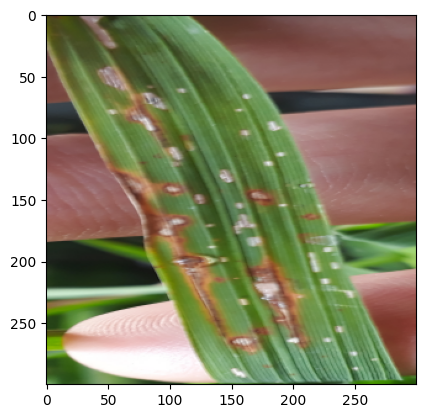

In [64]:
print("0----Bacterial Blight")
print("1----Blast")
print("2----BrownSpot")
print("3----Tungro")
print("x----Input Img")
print("y----Predicted Class")
print("[x y]Format")

count = 0
with torch.no_grad():
    for data in datatest:
        if count>0:
            break
        img, label = data
        out = model(img)
        _,pred = torch.max(out.data,1)
        img = img[0]
        plt.imshow(img.permute(1,2,0))
        print(label.item(),"  ",pred.item())
        print("Image:")
        count+=1
                                                                                          